In [219]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from sklearn.metrics import r2_score

In [27]:
subscribers = pd.read_csv('/home/amybirdee/jds_dilan_data/subscribers.csv', delimiter = ';')

In [28]:
subscribers.head()

,event_date,event_type,user_id
0,2018-01-01,subscribe,2458151268
1,2018-01-01,subscribe,2458151267
2,2018-01-01,subscribe,2458151309
3,2018-01-01,subscribe,2458151358
4,2018-01-01,subscribe,2458151361


In [29]:
#group by date for chart and regression data
subscribers = subscribers.groupby('event_date').count().user_id.to_frame(name = 'count_subscribers').reset_index()

In [187]:
#convert dates from object to datetime and then to numeric to use in regression analysis
subscribers['event_date'] = pd.to_datetime(subscribers.event_date)
subscribers['event_date'] = subscribers['event_date'].map(dt.datetime.toordinal)
subscribers.head()

,event_date,count_subscribers
0,736695,60
1,736696,115
2,736697,181
3,736698,47
4,736699,42


In [188]:
x = subscribers['event_date']
y = subscribers['count_subscribers']

In [189]:
#linear regression
model = np.polyfit(x, y, 2)
predict = np.poly1d(model)

In [190]:
subscriber_prediction = predict(x)

In [191]:
#converting dates back to date format for chart
date_1 = '2018-01-01'
date_2 = '2018-03-30'
my_dates = pd.date_range(date_1, date_2).tolist()

/usr/lib/python3/dist-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


Text(0.5, 1.0, 'Daily subscribers')

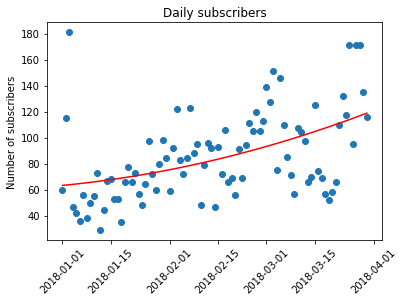

In [220]:
#chart shows existing date and regression line
ax = plt.subplot()
plt.scatter(my_dates, y)
plt.plot(my_dates, subscriber_prediction, color = 'red')
plt.xticks(rotation = 45)
plt.ylabel('Number of subscribers')
plt.title('Daily subscribers')

In [193]:
#predicting the future - creating a dataframe containing dates for 4 weeks ahead
future_date_1 = '2018-04-01'
future_date_2 = '2018-04-30'
future_dates = pd.DataFrame(pd.date_range(future_date_1, future_date_2))
future_dates.columns = ['date']

In [194]:
#converting dates to integer to use in model
future_dates['date'] = future_dates['date'].map(dt.datetime.toordinal)

In [206]:
future_dates.tail()

,date
25,736810
26,736811
27,736812
28,736813
29,736814


In [196]:
#running model for future dates
x_future = future_dates.date
y_future = predict(x_future)

In [197]:
model_future = np.polyfit(x_future, y_future, 2)
predict_future = np.poly1d(model_future)

In [198]:
future_subscribers = predict_future(x_future)

In [214]:
#creating new date list for 4 weeks' time for chart
future_date_1 = '2018-04-01'
future_date_2 = '2018-04-30'
new_dates = pd.date_range(future_date_1, future_date_2).tolist()

/usr/lib/python3/dist-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


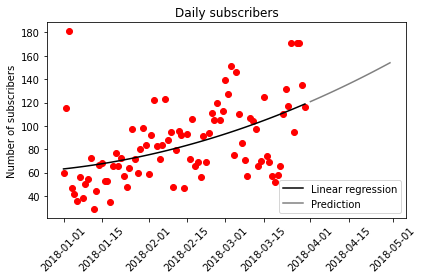

In [223]:
#chart shows existing data and future regression line
plt.scatter(my_dates, y, color = 'red')
plt.plot(my_dates, subscriber_prediction, color = 'black', label = 'Linear regression')
plt.plot(new_dates, future_subscribers, color = 'grey', label = 'Prediction')
plt.legend()
plt.xticks(rotation = 45)
plt.ylabel('Number of subscribers')
plt.title('Daily subscribers')
plt.tight_layout()
plt.savefig('subscribers.jpg')

In [208]:
#prediction for 4 weeks' time (the 736814 is 2018-04-30 coverted to integer as shown in the future_date.tail() 
#command above)
predict_future(736814)

154.04082536697388

In [210]:
#checking R2 score - data points are quite widely scattered and this is likely causing the low R2 score
r2_score(y, predict(x))

0.24038642584493786

In [211]:
#checking R2 score for future - this score is probably very unlikely!!
r2_score (y_future, predict_future(x_future))

0.9999999999999688